# Goodreads Exploratory Data Analysis

- Author: Kevin Chuang (https://www.github.com/k-chuang)
- Date: 03/22/2019
- Description: Kaggle competition on the Goodreads dataset to develop a recommender system to recommend books to users.

**Overview and Assignment Goals**

The objective of this assignment is to help you develop a recommender system for an medium-sized dataset, to gain hands-on skills on data preparation and recommender system algorithms.

For this assignment, you are asked to predict the rating that a user will give to a book given their past book ratings. At the very minimum you can use only this information for your recommender system. However, you are also given access to additional data, including book metadata, timestamps etc. in case you'd like to use them as well for your analysis.

In [1]:
__author__ = 'Kevin Chuang (https://www.github.com/k-chuang)' 

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Utilities
import os
import shutil
import json

## Load data

In [4]:
train_csv = r"data/train.csv"
test_csv = r"data/test.csv"
submission_csv = r"data/sample_output.csv"
book_metadata_path = r"data/goodreads_books_children.json"

In [3]:
def process_book_metdata_to_df(metadata_path):
    book_metadata = open(metadata_path).read().splitlines()
    for i, x in enumerate(book_metadata):
        book_metadata[i] = json.loads(book_metadata[i])
    book_df = pd.DataFrame(book_metadata)
    return book_df

In [5]:
book_df = process_book_metdata_to_df(book_metadata_path)

In [7]:
train_df = pd.read_csv(train_csv, delimiter="\t")
test_df = pd.read_csv(test_csv, delimiter="\t")

## Analyze data

In [11]:
train_users = np.unique(train_df['user_id'])
test_users = np.unique(test_df['user_id'])

print("Number of unique users in training set: {}".format(len(train_users)))
print("Number of unique users in test set: {}".format(len(test_users)))
print("Number of non-intersecting users of train & test set: {}".format(np.setdiff1d(train_users, test_users).shape[0]))

# There are different around 7757 differnet users in train and test set

Number of unique users in training set: 35280
Number of unique users in test set: 29471
Number of non-intersecting users of train & test set: 7757


In [16]:
train_books = np.unique(train_df['book_id'])
test_books = np.unique(test_df['book_id'])

print("Number of unique books in training set: {}".format(len(train_books)))
print("Number of unique books in test set: {}".format(len(test_books)))
print("Number of non-intersecting books of train & test set: {}".format(np.setdiff1d(train_books, test_books).shape[0]))

Number of unique book in training set: 68371
Number of unique book in test set: 47672
Number of non-intersecting book of train & test set: 30100


In [14]:
print("Distinct values of ratings: {}".format(np.unique(train_df['rating'])))

Distinct values of ratings: [0 1 2 3 4 5]


In [25]:
tmp1 = train_df.groupby("user_id")['user_id'].count().min()
tmp2 = train_df.groupby("book_id")['book_id'].count().min()
print('For the users that rated books and the books that were rated:')
print('Minimum number of ratings per user is {}'.format(tmp1))
print('Minimum number of ratings per book is {}'.format(tmp2))

For the users that rated books and the books that were rated:
Minimum number of ratings per user is 1
Minimum number of ratings per book is 1


In [23]:
book_count = sum(train_df.groupby(["book_id"])["book_id"].count() == 1)

print('{} out of {} books are rated by only one user'.format(book_count, len(train_books)))

25851 out of 68371 books are rated by only one user


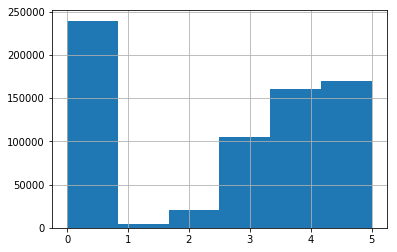

In [27]:
# Plot histogram of ratings
train_df.rating.hist( bins = 6 )

There are a lot of "0" ratings, and relatively low "1" and "2" ratings.

### Reviews per book

Most books have few ratings (1-5 ratings).

In [28]:
# Reviews per book
reviews_per_book = train_df.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    68371.000000
mean        10.238259
std         94.036216
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max      11213.000000
Name: book_id, dtype: float64

### Reviews per user

Most users have few ratings (1-16 ratings).

In [29]:
reviews_per_user = train_df.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    35280.000000
mean        19.841270
std         70.433534
min          1.000000
25%          2.000000
50%          6.000000
75%         16.000000
max       4287.000000
Name: user_id, dtype: float64

## Book Metadata 

- There are multiple languages, not just English
- There are missing descriptions of books, and also the descriptions contain html tags.
- There are multiple authors per book (illustrators)

In [30]:
book_df.head()

,asin,authors,average_rating,book_id,country_code,description,edition_information,format,image_url,is_ebook,...,publication_day,publication_month,publication_year,publisher,ratings_count,series,similar_books,text_reviews_count,url,work_id
0,,"[{'author_id': '3041852', 'role': ''}]",4.13,287141,US,"Relates in vigorous prose the tale of Aeneas, ...",,Paperback,https://s.gr-assets.com/assets/nophoto/book/11...,false,...,13,9,2006,Yesterday's Classics,46,[],[],7,https://www.goodreads.com/book/show/287141.The...,278578
1,,"[{'author_id': '19158', 'role': ''}]",4.22,6066812,US,"<br /><p>To Kara's astonishment, she discovers...",,Paperback,https://images.gr-assets.com/books/1316637798m...,false,...,3,3,2009,Seven Seas,98,[s151854],"[948696, 439885, 274955, 12978730, 372986, 216...",6,https://www.goodreads.com/book/show/6066812-al...,701117
2,,"[{'author_id': '5411', 'role': ''}]",4.43,89378,US,In Newbery Medalist Cynthia Rylant's classic b...,,Hardcover,https://images.gr-assets.com/books/1360057676m...,false,...,1,9,1995,Blue Sky Press,1331,[],"[834493, 452189, 140185, 1897316, 2189812, 424...",193,https://www.goodreads.com/book/show/89378.Dog_...,86259
3,,"[{'author_id': '589328', 'role': ''}, {'author...",4.29,3209312,US,,,,https://s.gr-assets.com/assets/nophoto/book/11...,false,...,,,,,11,[],[],4,https://www.goodreads.com/book/show/3209312-mo...,3242879
4,,"[{'author_id': '169159', 'role': ''}]",3.57,1698376,US,<b>WHAT DO YOU DO? <br /><br /> A hen lays egg...,,Board Book,https://s.gr-assets.com/assets/nophoto/book/11...,false,...,1,6,2005,Little Simon,23,[],[],4,https://www.goodreads.com/book/show/1698376.Wh...,1695373
